In [1]:
import logging
logging.basicConfig(level=logging.INFO)

import PIL.Image
import graphcat.notebook
import numpy
import skimage

import imagecat.notebook



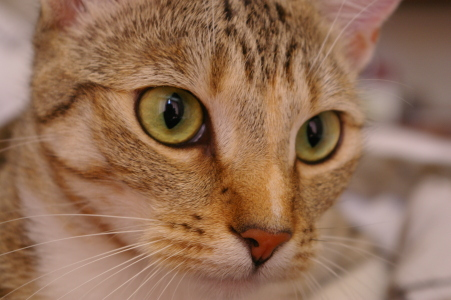

In [2]:
image = skimage.data.chelsea()
PIL.Image.fromarray(image)

In [3]:
image = skimage.img_as_float(image).astype(numpy.float16)
image = imagecat.data.Image({"C": imagecat.data.Layer(data=imagecat.color.srgb_to_linear(image), components=["r", "g", "b"], role=imagecat.data.Role.RGB)})

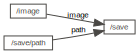

In [4]:
graph = graphcat.DynamicGraph()
graph.set_task("/image", graphcat.constant(image))
imagecat.add_task(graph, "/save", imagecat.operator.save, path="test.exr")
graph.add_links("/image", ("/save", "image"))

graphcat.notebook.display(graph)
graph.update("/save")

INFO:imagecat.operator:Task /load load:
INFO:imagecat.operator:  layers: *
INFO:imagecat.operator:  path: test.exr
INFO:imagecat.operator:  output: Image(C.b: Layer(451x300x1 float16 [''] Role.NONE), C.g: Layer(451x300x1 float16 [''] Role.NONE), C.r: Layer(451x300x1 float16 [''] Role.NONE))


{'channels': {'C.b': HALF (1, 1), 'C.g': HALF (1, 1), 'C.r': HALF (1, 1)}, 'compression': ZIP_COMPRESSION, 'dataWindow': (0, 0) - (450, 299), 'displayWindow': (0, 0) - (450, 299), 'lineOrder': INCREASING_Y, 'pixelAspectRatio': 1.0, 'screenWindowCenter': (0.0, 0.0), 'screenWindowWidth': 1.0}



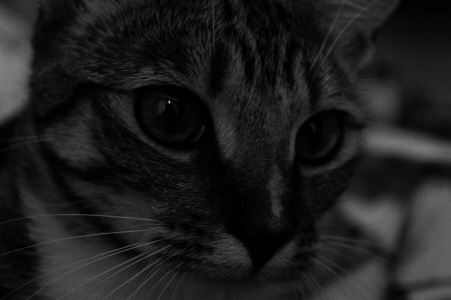
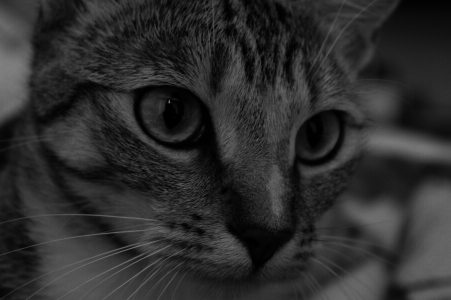
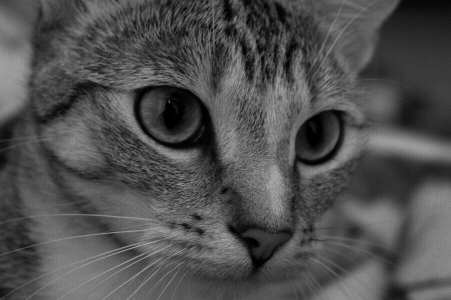

In [5]:
graph = graphcat.DynamicGraph()
imagecat.add_task(graph, "/load", imagecat.operator.load, path="test.exr")
graphcat.notebook.display(graph)
imagecat.notebook.display(graph.output("/load"))